In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

# PCA para acelerar algoritmos de machine learning  

#### Vamos a ver una prueba de concepto donde nuestro objetivo es ver como PCA puede reducir nuestro tiempo de procesamiento 

Vamos a utilizar MINST dataset que se compone de imagenes de 28x28 pixeles de numeros escritos a mano. 

Cada data point de MNIST es una imagen. Cada imagen es un array de 28x28 con numeros que describen cuan negro es el pixel. 

Si lo ponemos en un vector cada imagen tiene una dimensionalirdad de  784 (28x28) donde cada uno tiene un valor entre zero y uno. 

Mas informacion del dataset y como analizarlo:

https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
#Vemos que mnist es un diccionario donde los datos se encuentran en "data"
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X = mnist.data[:10000]
mnist.data.shape
#Sabemos que hay 70000 imagenes con la dimensionalidad antes mencionada

(70000, 784)

In [5]:
np.unique(mnist.target)
#Los labels son valores que van del 0 al 9 

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [6]:
y = mnist.target[:10000]
mnist.target.shape

(70000,)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0, random_state=0)

In [9]:
# Scalamos nuestros datos
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Vamos reducir el dataset original en diferentes proporciones y ver cuales son los tiempos de entrenamientos

#### 1 - Entendemos la relacion entre la varianza explicada y la cantidad de componentes elegidos

In [10]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 784
pca_data = pca.fit_transform(x_train)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

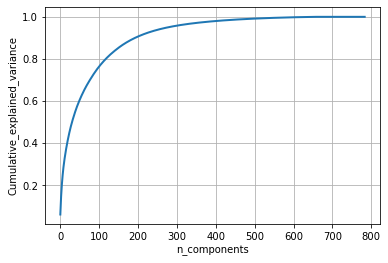

In [11]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#### 2 - Entrenamos la regresion logistica sin aplicar PCA

In [12]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
start = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train, y_train)
stop = time.time()
time_100 = stop - start
print(f"Training time: {time_100}s")
score_100 = logisticRegr.score(x_test, y_test)
print("Score:", score_100)

Training time: 5.908616065979004s
Score: 0.8817354793561931


#### 3 - Entrenamos la regresion logistica PCA 95% de varianza

In [13]:
# Make an instance of the Model
pca_95 = PCA(.95)
pca_95.fit(x_train)
n_95 = pca_95.n_components_ 
print(pca_95.n_components_ )

278


In [14]:
x_train_95 = pca_95.transform(x_train)
x_test_95 = pca_95.transform(x_test)

In [15]:
start_95 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_95, y_train)
stop_95 = time.time()
time_95 = stop_95 - start_95
print(f"Training time: {time_95}s")
score_95 = logisticRegr.score(x_test_95, y_test)
print("Score:", score_95)

Training time: 1.6670434474945068s
Score: 0.900629811056683


#### 4 - Entrenamos la regresion logistica PCA 80% de varianza

In [16]:
# Make an instance of the Model
pca_80 = PCA(.80)
pca_80.fit(x_train)

x_train_80 = pca_80.transform(x_train)
x_test_80 = pca_80.transform(x_test)
n_80 = pca_80.n_components_ 
print(n_80)

118


In [17]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
start_80 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_80, y_train)
stop_80 = time.time()
time_80 = stop_80 - start_80
print(f"Training time: {time_80}s")
score_80 = logisticRegr.score(x_test_80, y_test)
print("Score:", score_80)

Training time: 1.2832646369934082s
Score: 0.9132260321903429


#### 5 - Entrenamos la regresion logistica PCA 70% de varianza

In [18]:
# Make an instance of the Model
pca_70 = PCA(.70)
pca_70.fit(x_train)

x_train_70 = pca_70.transform(x_train)
x_test_70 = pca_70.transform(x_test)
n_70 = pca_70.n_components_ 
print(n_70)

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
start_70 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_70, y_train)
stop_70 = time.time()
time_70 = stop_70 - start_70
print(f"Training time: {time_70}s")
score_70 = logisticRegr.score(x_test_70, y_test)
print("Score:", score_70)

77
Training time: 0.9094951152801514s
Score: 0.9090272918124562


#### 6 - Resumen de los resultados encontramos. Que conclusiones sacamos?

In [19]:
pd.DataFrame(data = [[1.00, 784, time_100,score_100],
                     [.95, n_95, time_95, score_95],
                     [.80, n_80, time_80, score_80],
                     [.70, n_70, time_70, score_70]],
             columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy'])

,Variance Retained,Number of Components,Time (seconds),Accuracy
0,1.00,784,5.908616,0.881735
1,0.95,278,1.667043,0.900630
2,0.80,118,1.283265,0.913226
3,0.70,77,0.909495,0.909027


## Agisnacion: Obtener la tabla anterior para el iris dataset usando un algoritmo de clasificacion a eleccion

### Comparar los resultados

In [20]:
from sklearn.datasets import load_iris
data = load_iris()

In [21]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
data.target.shape

(150,)

In [54]:
data

(150, 4)

In [108]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [109]:
np.unique(data.target)

array([0, 1, 2])

In [138]:
x=data.data
data.data.shape

(150, 4)

In [139]:
y=data.target
data.target.shape


(150,)

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7.0, random_state=0)

In [141]:
# Scalamos nuestros datos
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [142]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 4
pca_data = pca.fit_transform(x_train)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

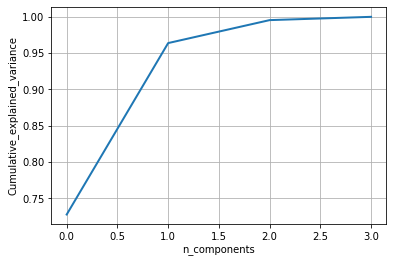

In [143]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [144]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
start = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train, y_train)
stop = time.time()
time_100 = stop - start
print(f"Training time: {time_100}s")
score_100 = logisticRegr.score(x_test, y_test)
print("Score:", score_100)

Training time: 0.019987106323242188s
Score: 1.0


In [145]:
# Make an instance of the Model
pca_95 = PCA(.95)
pca_95.fit(x_train)
n_95 = pca_95.n_components_ 
print(pca_95.n_components_ )

2


In [146]:
x_train_95 = pca_95.transform(x_train)
x_test_95 = pca_95.transform(x_test)

In [147]:
start_95 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_95, y_train)
stop_95 = time.time()
time_95 = stop_95 - start_95
print(f"Training time: {time_95}s")
score_95 = logisticRegr.score(x_test_95, y_test)
print("Score:", score_95)

Training time: 0.013971328735351562s
Score: 0.8181818181818182


In [148]:
# Make an instance of the Model
pca_80 = PCA(.80)
pca_80.fit(x_train)

x_train_80 = pca_80.transform(x_train)
x_test_80 = pca_80.transform(x_test)
n_80 = pca_80.n_components_ 
print(n_80)

2


In [149]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
start_80 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_80, y_train)
stop_80 = time.time()
time_80 = stop_80 - start_80
print(f"Training time: {time_80}s")
score_80 = logisticRegr.score(x_test_80, y_test)
print("Score:", score_80)

Training time: 0.012993335723876953s
Score: 0.8181818181818182


In [150]:
# Make an instance of the Model
pca_70 = PCA(.70)
pca_70.fit(x_train)

x_train_70 = pca_70.transform(x_train)
x_test_70 = pca_70.transform(x_test)
n_70 = pca_70.n_components_ 
print(n_70)

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
start_70 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_70, y_train)
stop_70 = time.time()
time_70 = stop_70 - start_70
print(f"Training time: {time_70}s")
score_70 = logisticRegr.score(x_test_70, y_test)
print("Score:", score_70)

1
Training time: 0.013991355895996094s
Score: 0.8181818181818182


In [151]:
pd.DataFrame(data = [[1.00, 4, time_100,score_100],
                     [.95, n_95, time_95, score_95],
                     [.80, n_80, time_80, score_80],
                     [.70, n_70, time_70, score_70]],
             columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy'])

,Variance Retained,Number of Components,Time (seconds),Accuracy
0,1.00,4,0.019987,1.000000
1,0.95,2,0.013971,0.818182
2,0.80,2,0.012993,0.818182
3,0.70,1,0.013991,0.818182


In [124]:
(Variance Retained 1; Number of Components 4; Time 0.019987; Accuracy 1.000000) (Variance Retained 0.95; Number of Components 2; Time 0.013971;	Accuracy 0.818182)(Variance Retained 0.8; Number of Components 2; Time 0.012993; Accuracy 0.818182)(Variance Retained 0.7; Number of Components 1; Time 0.013991; Accuracy 0.818182)


SyntaxError: invalid syntax (<ipython-input-124-57ee62885db7>, line 1)

In [ ]:
(Variance Retained 1; Number of Components 4; Time 0.019987; Accuracy 1.000000) (Variance Retained 0.95; Number of Components 2; Time 0.013971;	Accuracy 0.818182)(Variance Retained 0.8; Number of Components 2; Time 0.012993; Accuracy 0.818182)(Variance Retained 0.7; Number of Components 1; Time 0.013991; Accuracy 0.818182)